<a href="https://colab.research.google.com/github/chaitragopalappa/MIE590-690D/blob/main/8b_Lab_Pipelines_HuggingFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: this notebook contains text/code directly copied from cited sources for purpose of class lecture only.


# Using Transformers in HuggingFace
Source: https://huggingface.co/learn/llm-course/chapter1/3
Hugging Face, The Hugging Face Course, 2022, https://huggingface.co/course, 2022

What is HugggingFace Transformers? *It is an open-source Python library that provides access to thousands of pre-trained Transformers models for natural language processing (NLP), computer vision, audio tasks, and more.*

- *The most basic object in the 🤗 Transformers library is the pipeline() function.*
- *It connects a model with its necessary preprocessing and postprocessing steps, allowing us to directly input any text and get an intelligible answer*
- **Pipeline selects a particular pretrained model that has been fine-tuned for specific tasks**

[**"Awesome projects built with Transformers"**](https://github.com/huggingface/transformers/blob/main/awesome-transformers.md)

# **Pipelines in HuggingFace - Use pretrained models that have been fine-tuned for specific tasks**
Text pipelines

    text-generation: Generate text from a prompt
    text-classification: Classify text into predefined categories
    summarization: Create a shorter version of a text while preserving key information
    translation: Translate text from one language to another
    zero-shot-classification: Classify text without prior training on specific labels
    feature-extraction: Extract vector representations of text

Image pipelines

    image-to-text: Generate text descriptions of images
    image-classification: Identify objects in an image
    object-detection: Locate and identify objects in images

Audio pipelines

    automatic-speech-recognition: Convert speech to text
    audio-classification: Classify audio into categories
    text-to-speech: Convert text to spoken audio

Multimodal pipelines

    image-text-to-text: Respond to an image based on a text prompt

Best suited modes

  ### 🔧 NLP Tasks and Suitable Model Architectures

| **Task** | **Suggested Architecture** | **Examples** |
|---------|----------------------------|--------------|
| Text classification (sentiment, topic) | Encoder | BERT, RoBERTa |
| Text generation (creative writing) | Decoder | GPT, LLaMA |
| Translation | Encoder–Decoder | T5, BART |
| Summarization | Encoder–Decoder | BART, T5 |
| Named entity recognition | Encoder | BERT, RoBERTa |
| Question answering (extractive) | Encoder | BERT, RoBERTa |
| Question answering (generative) | Encoder–Decoder or Decoder | T5, GPT |
| Conversational AI | Decoder | GPT, LLaMA |


    

# **EXAMPLE 1: USE MODEL FOR SENTIMENT ANALYSIS**
Install the Transformers, Datasets, and Evaluate libraries to run this notebook.

## **DIRECTLY USE PIPELINE**

In [ ]:
!pip install datasets evaluate transformers[sentencepiece]

In [10]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")#initializes a pre-trained sentiment analysis model
classifier("I've been waiting for a HuggingFace course my whole life.")#classify user-defied sentence

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9598049521446228}]

In [11]:
classifier(
    ["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"]
)

[{'label': 'POSITIVE', 'score': 0.9598049521446228},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

## **SEE WHATS HAPPENING BEHIND THE PIPELINE**

Above pipeline groups together three steps: preprocessing, passing the inputs through the model, and postprocessing:
![](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter2/full_nlp_pipeline.svg)
![](https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter2/transformer_and_head.svg)

In [ ]:
from transformers import AutoTokenizer #automatically use the correct tokenizer specific to model
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"# DistilBERT fine-tuned for sentiment analysis (using SST-2 dataset https://huggingface.co/datasets/stanfordnlp/sst2) (There are over 1M+ Transformers model checkpoints on the Hugging Face Hub we can use.)
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print("Print tokenized inputs: input ids + attention mask \n", inputs)
#-------------------

from transformers import AutoModel
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint) #AutoModel loads only the base transformer encoder, without any classification head.
outputs = model(**inputs)
print("Print last_hidden_state: shape (batch_size, sequence_length, hidden_dim) \n", outputs.last_hidden_state.shape) #DistilBERT, hidden_dim = 768
#------------------

from transformers import AutoModelForSequenceClassification
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint) # This loads the DistilBERT encoder plus a classifier layer trained for SST-2 (positive/negative). Output includes: logits: raw predictions for each class.
outputs = model(**inputs)
print(outputs.logits.shape)
print("Print logits: raw predictions for each class \n", outputs.logits)

import torch
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1) #Softmax converts logits into probabilities.
print("Print predictions:\n", predictions)
model.config.id2label #Returns the mapping from class index to label name.

# **OTHER PIPELINE EXAMPLES**

In [12]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445994257926941, 0.11197380721569061, 0.04342673346400261]}

In [13]:
from transformers import pipeline

generator = pipeline("text-generation")
generator("In this course, we will teach you how to")

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to build your own computer and share your ideas with others. We will also provide you with a wealth of free software that you can download to use with your own projects.'}]

In [15]:
from transformers import pipeline

generator = pipeline("text-generation", model="distilgpt2")
generator(
    "In this course, we will teach you how to",
    max_length=30,
    num_return_sequences=2,
)

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': 'In this course, we will teach you how to use the techniques in order to learn the basics of the technique and how you can use the techniques in order to learn the techniques in order to learn the techniques in order to learn the techniques in order to learn the techniques in order to learn the techniques in order to learn the techniques in order to learn the techniques in order to learn the techniques in order to learn the techniques in order to learn the techniques in order to learn the techniques in order to learn the techniques in order to learn the techniques in order to learn the techniques in order to learn the techniques in order to learn the techniques in order to learn the techniques in order to learn the techniques in order to learn the techniques in order to learn the techniques in order to learn the techniques in order to learn the techniques in order to learn the techniques in order to learn the techniques in order to learn the techniques in order to l

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask")
unmasker("This course will teach you all about <mask> models.", top_k=2)

In [16]:
from transformers import pipeline

ner = pipeline("ner", grouped_entities=True)
ner("My name is Sylvain and I work at Hugging Face in Brooklyn.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu
/usr/local/lib/python3.12/dist-packages/transformers/pipelines/token_classification.py:186: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


[{'entity_group': 'PER',
  'score': np.float32(0.9981694),
  'word': 'Sylvain',
  'start': 11,
  'end': 18},
 {'entity_group': 'ORG',
  'score': np.float32(0.9796019),
  'word': 'Hugging Face',
  'start': 33,
  'end': 45},
 {'entity_group': 'LOC',
  'score': np.float32(0.9932106),
  'word': 'Brooklyn',
  'start': 49,
  'end': 57}]

In [ ]:
from transformers import pipeline

question_answerer = pipeline("question-answering")
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization")
summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of
    graduates in traditional engineering disciplines such as mechanical, civil,
    electrical, chemical, and aeronautical engineering declined, but in most of
    the premier American universities engineering curricula now concentrate on
    and encourage largely the study of engineering science. As a result, there
    are declining offerings in engineering subjects dealing with infrastructure,
    the environment, and related issues, and greater concentration on high
    technology subjects, largely supporting increasingly complex scientific
    developments. While the latter is important, it should not be at the expense
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other
    industrial countries in Europe and Asia, continue to encourage and advance
    the teaching of engineering. Both China and India, respectively, graduate
    six and eight times as many traditional engineers as does the United States.
    Other industrial countries at minimum maintain their output, while America
    suffers an increasingly serious decline in the number of engineering graduates
    and a lack of well-educated engineers.
"""
)

In [ ]:
from transformers import pipeline

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en")
translator("Ce cours est produit par Hugging Face.")

In [ ]:
from transformers import pipeline

image_classifier = pipeline(
    task="image-classification", model="google/vit-base-patch16-224"
)
result = image_classifier(
    "https://diseasemodeling.github.io/docs/assets/LabOverview.png"
)
print(result)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


[{'label': 'web site, website, internet site, site', 'score': 0.620556652545929}, {'label': 'scoreboard', 'score': 0.10800295323133469}, {'label': 'slot, one-armed bandit', 'score': 0.06280945986509323}, {'label': 'analog clock', 'score': 0.014440597034990788}, {'label': 'crossword puzzle, crossword', 'score': 0.013516860082745552}]


In [17]:
from transformers import pipeline

segmenter = pipeline(model="facebook/detr-resnet-50-panoptic")
segments = segmenter("https://huggingface.co/datasets/Narsil/image_dummy/raw/main/parrots.png")


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2441: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2441: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2441: UserWarning: for bn1.bias: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pas

**display actual and segmented image**

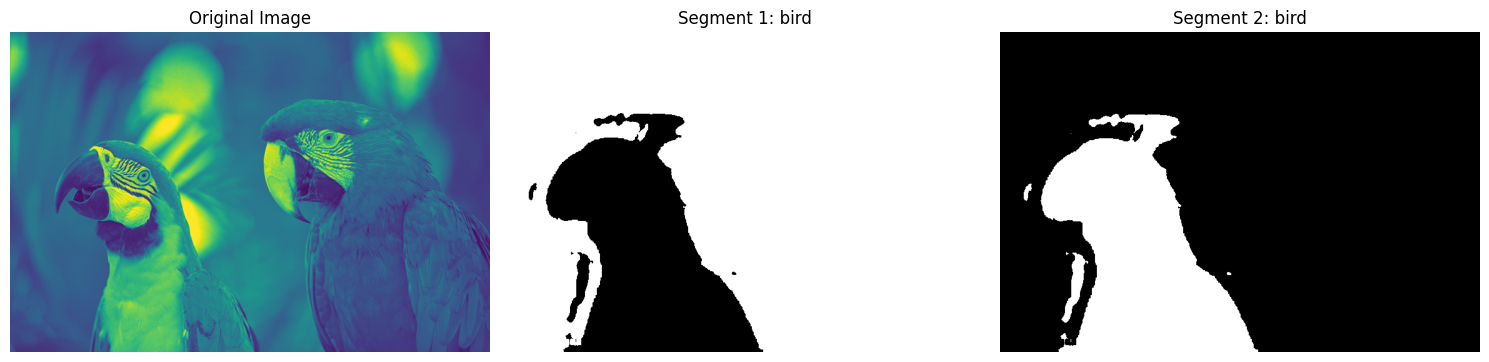

In [18]:
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# URL of the original image used for segmentation
image_url = "https://huggingface.co/datasets/Narsil/image_dummy/raw/main/parrots.png"

# Fetch and open the original image
response = requests.get(image_url)
original_image = Image.open(BytesIO(response.content))

# Create a figure with subplots: one for the original image and one for each mask
num_segments = len(segments)
fig, axes = plt.subplots(1, num_segments + 1, figsize=(5 * (num_segments + 1), 5))

# Display the original image in the first subplot
axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Display each segmented mask in subsequent subplots
for i, segment in enumerate(segments):
    ax = axes[i + 1]
    ax.imshow(segment['mask'], cmap='gray') # Masks are typically grayscale
    ax.set_title(f"Segment {i + 1}: {segment['label']}")
    ax.axis("off")

plt.tight_layout()
plt.show()